In [1]:
#!/usr/bin/python3.10

Prerequisites: pandas, xlrd, matplotlib, rpy2

# HSMC modelling

## Configuration
### It is assumed that this notebook is run from StructureAnalysis/sequence_analysis/tutorials

**Import OpenAlea packages**

In [2]:
from openalea.stat_tool import _stat_tool
from openalea.sequence_analysis import _sequence_analysis
from openalea.sequence_analysis.hidden_semi_markov import HiddenSemiMarkov
from openalea.sequence_analysis.simulate import Simulate
from openalea.sequence_analysis.data_transform import Thresholding

from openalea.stat_tool.data_transform import *
from openalea.stat_tool.cluster import Cluster
from openalea.stat_tool.cluster import Transcode, Cluster

import openalea.stat_tool.plot #import DISABLE_PLOT
from openalea.stat_tool.plot import DISABLE_PLOT
DISABLE_PLOT = False

import os

from openalea.stat_tool.output import plot, Plot

plot.DISABLE_PLOT = DISABLE_PLOT

from openalea.stat_tool.plot import get_plotter, mplotlib 

##### Check pandas version

In [3]:
# print pd.__version__

In [4]:
import xlrd
xlrd.__version__

'2.0.1'

For correct figure rendering

In [5]:
%matplotlib inline

##### Enabling R extensions

In [6]:
%load_ext rpy2.ipython

#####  Place variables in markdown outputs

In [7]:
from IPython.display import Markdown
from IPython.core.magic import register_cell_magic


@register_cell_magic
def markdown(line, cell):
    return Markdown(cell.format(**globals()))

## Determining if images have to be saved (not used for the moment)

## Loading and preparing data

In [8]:
import sys, os

In [9]:
sys.path

['/home/jdurand/devlp/Git/openalea/StructureAnalysis',
 '/home/jdurand/miniforge3/envs/openalea/lib/python310.zip',
 '/home/jdurand/miniforge3/envs/openalea/lib/python3.10',
 '/home/jdurand/miniforge3/envs/openalea/lib/python3.10/lib-dynload',
 '',
 '/home/jdurand/.local/lib/python3.10/site-packages',
 '/home/jdurand/miniforge3/envs/openalea/lib/python3.10/site-packages',
 '/home/jdurand/miniforge3/envs/openalea/lib/python3.10/site-packages/OpenAlea.SConsX-2.4.0-py3.9.egg',
 '/home/jdurand/devlp/Git/openalea/StructureAnalysis/sequence_analysis/src',
 '/home/jdurand/miniforge3/envs/openalea/lib/python3.10/site-packages/OpenAlea.StatTool-2.0.0-py3.10-linux-x86_64.egg',
 '/home/jdurand/devlp/Git/openalea/StructureAnalysis/stat_tool/src',
 '/home/jdurand/miniforge3/envs/openalea/lib/python3.10/site-packages/openalea.deploy-3.1.2-py3.10.egg']

In [10]:
sys.path.append(".." + os.sep + "tutorials")

In [11]:
# TODO: fix this
# get_shared_data("data")

In [12]:
from pathlib import Path
from openalea.sequence_analysis import __path__ as seq_path
data_path = Path(seq_path[0])
data_path = str(Path.joinpath(data_path.parent.parent.parent.absolute(), "share","data"))


# Estimate HSMC with nonparametric emission distributions

**Read an existing HSMC model**

In [13]:
model_file = "test_hidden_semi_markov.dat"

f = open(data_path + os.sep + model_file, "r")
f.close()

hsm = HiddenSemiMarkov(data_path + os.sep + model_file)

1  HIDDEN_SEMI-MARKOV_CHAIN
2  
3  8 STATES
4  
5  INITIAL_PROBABILITIES
6  0.4 0.3 0.3 0.0 0.0 0.0 0.0 0.0
7  
8  TRANSITION_PROBABILITIES
9  0.0 0.4 0.3 0.3 0.0 0.0 0.0 0.0
10  0.0 0.0 0.4 0.3 0.3 0.0 0.0 0.0
11  0.0 0.0 0.0 0.4 0.3 0.3 0.0 0.0
12  0.0 0.0 0.0 0.0 0.4 0.3 0.3 0.0
13  0.0 0.0 0.0 0.0 0.0 0.4 0.3 0.3
14  0.0 0.0 0.0 0.0 0.0 0.0 0.5 0.5
15  0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0
16  0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0
17  
18  STATE 0 OCCUPANCY_DISTRIBUTION
19 NEGATIVE_BINOMIAL  INF_BOUND : 1  PARAMETER : 1  PROBABILITY : 0.05
20  
21  STATE 1 OCCUPANCY_DISTRIBUTION
22 NEGATIVE_BINOMIAL  INF_BOUND : 1  PARAMETER : 1  PROBABILITY : 0.05
23  
24  STATE 2 OCCUPANCY_DISTRIBUTION
25 NEGATIVE_BINOMIAL  INF_BOUND : 1  PARAMETER : 1  PROBABILITY : 0.05
26  
27  STATE 3 OCCUPANCY_DISTRIBUTION
28 NEGATIVE_BINOMIAL  INF_BOUND : 1  PARAMETER : 1  PROBABILITY : 0.05
29  
30  STATE 4 OCCUPANCY_DISTRIBUTION
31 NEGATIVE_BINOMIAL  INF_BOUND : 1  PARAMETER : 1  PROBABILITY : 0.05
32  
33  STATE 5 O

In [14]:
from openalea.sequence_analysis import Estimate
from openalea.sequence_analysis import seq_map    

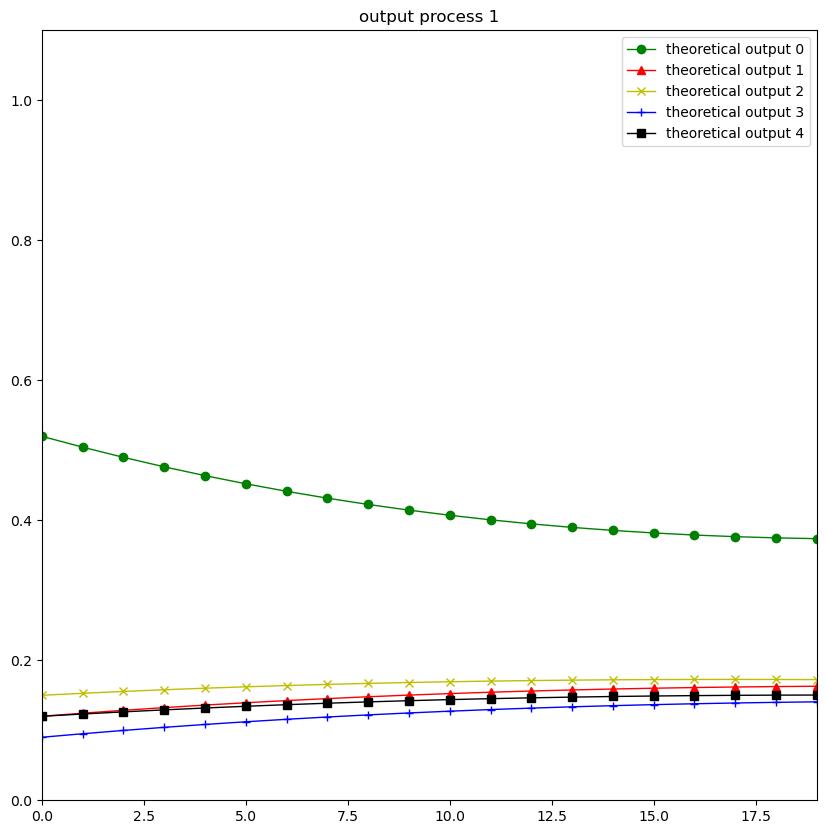

In [15]:
hsm.plot("Intensity", 1)

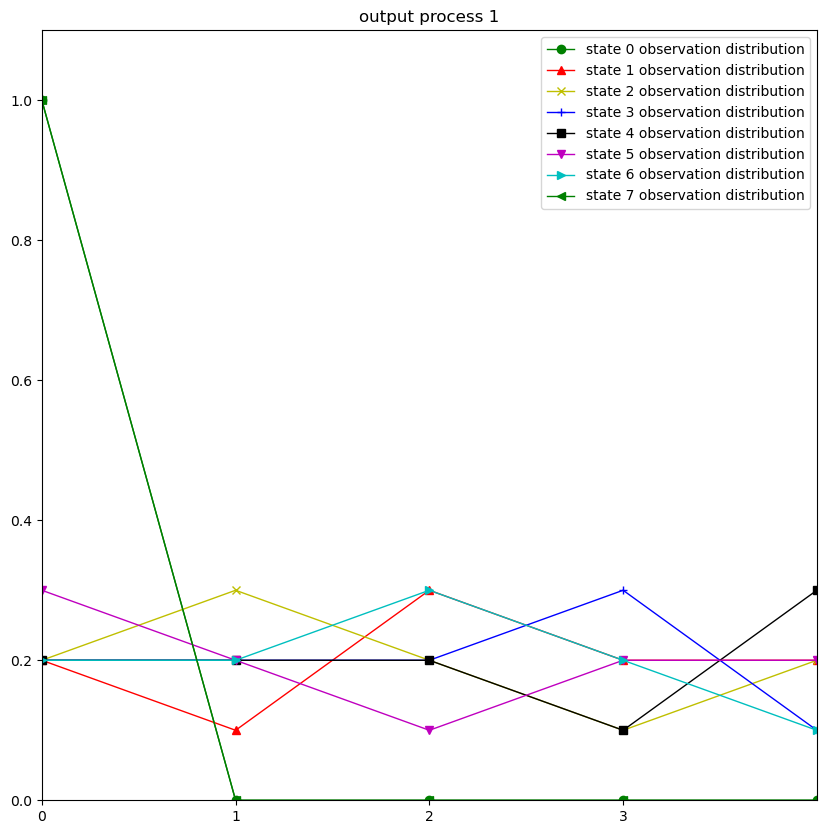

In [16]:
hsm.plot("Observation", 1)

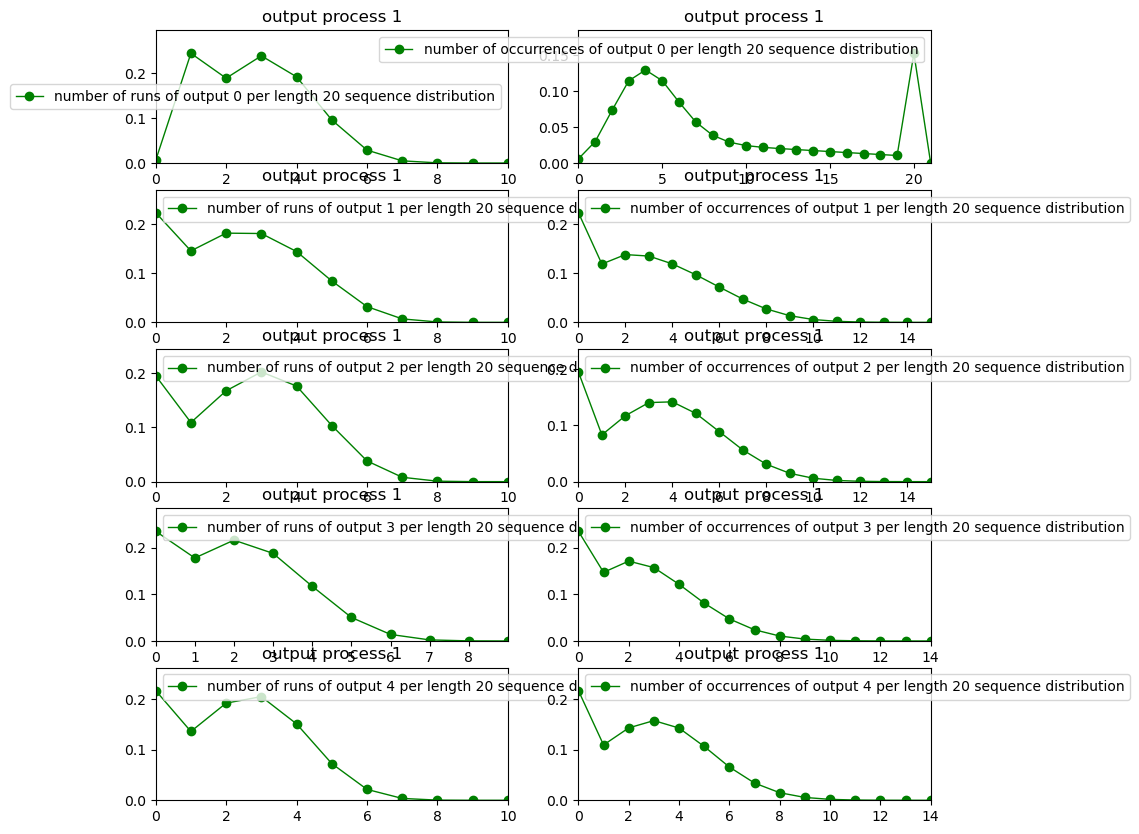

In [17]:
hsm.plot("Counting", 1)

In [18]:
# Note that hsm.plot("Counting", 1)  replaces hsm.plot("NbRun", 1) and hsm.plot("NbOccurrence", 1)

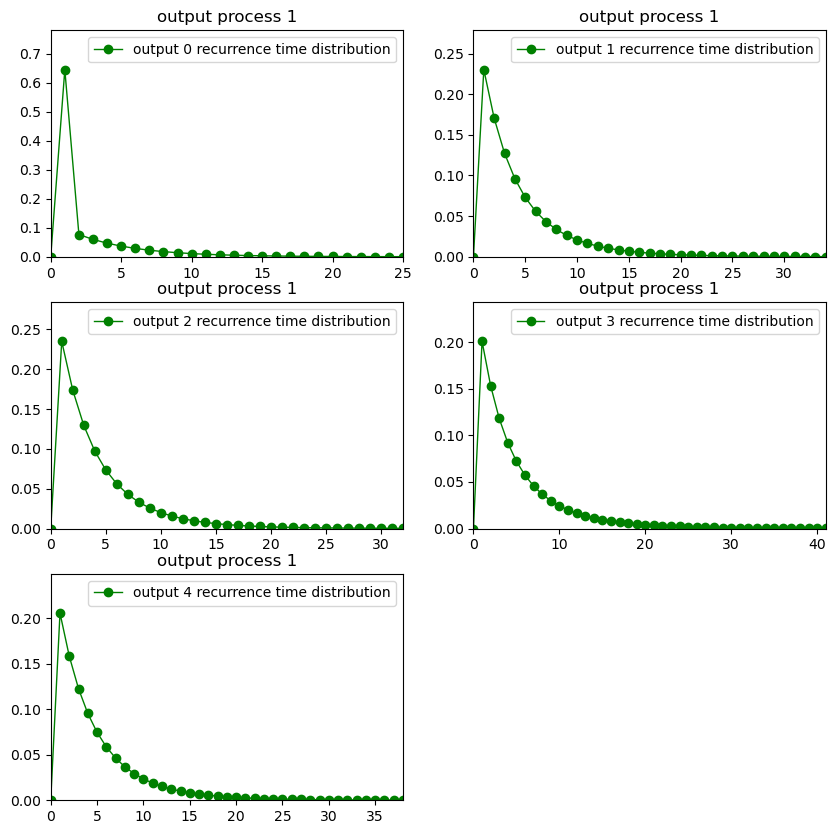

In [19]:
hsm.plot("Recurrence", 1)


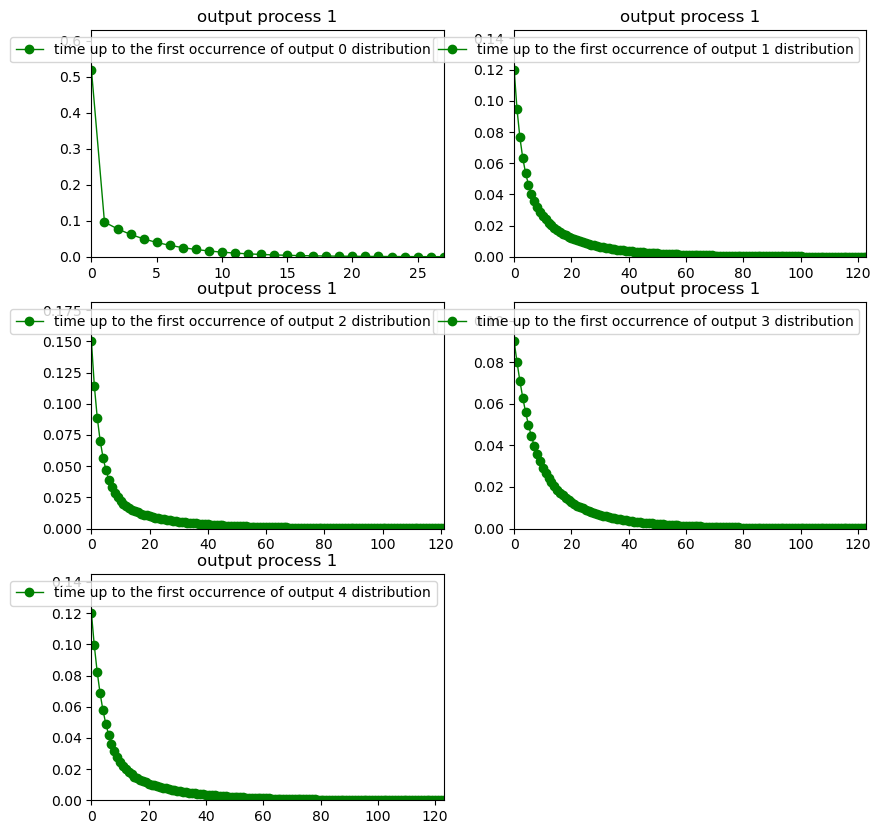

In [20]:
hsm.plot("FirstOccurrence", 1)

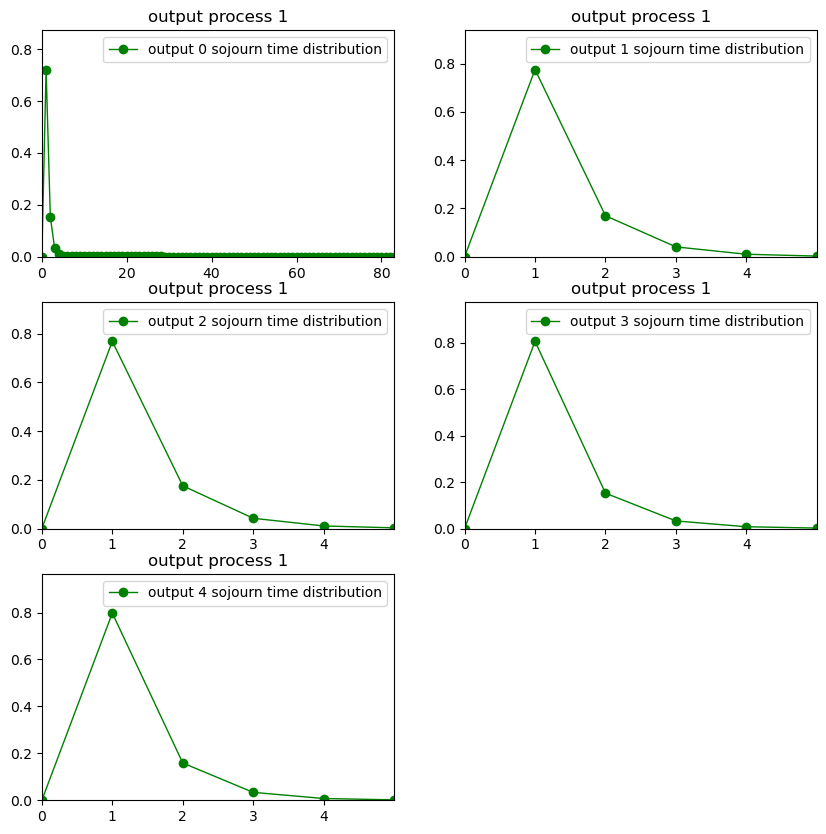

In [21]:
hsm.plot("Sojourn", 1)

In [22]:
# hsm.plot()

**Simulate sequences**

In [23]:
from openalea.sequence_analysis import Simulate

In [24]:
from openalea.stat_tool.distribution import set_seed
set_seed(0)

Simulate *nb_seq* sequences with length *seq_length*

In [25]:
nb_seq = 30
seq_length = 100
seq = hsm.simulation_nb_sequences(nb_seq, seq_length, True)
assert(len(seq) == nb_seq)
assert(len(seq[0]) == seq_length)
# NB: hsm has 1 output process but simulation includes the hidden state
assert(len(seq[0][1]) == 2)


log-likelihood: -3390.17 | -3390.17

N.o. initial states in parallel: 1
0 0 0
1 0.984795 0.984795
2 0.0152052 0.0152052
0 0 0
1 0.99058 0.99058
2 0.00941983 0.00941983
0 0.998228 0.998228
1 0.00133956 0.00133956
2 0.000432888 0.000432888
0 0 0
1 0.808848 0.808848
2 0.191152 0.191152
0 0 0
1 0.226011 0.226011
2 0.773989 0.773989
0 0 0
1 0.254963 0.254963
2 0.745037 0.745037
0 0 0
1 0.546822 0.546822
2 0.453178 0.453178
0 0 0
1 0.26518 0.26518
2 0.73482 0.73482
0 0 0
1 0.328858 0.328858
2 0.671142 0.671142
0 1 1
1 1.38916e-26 1.38916e-26
2 1.2453e-25 1.2453e-25
0 0 0
1 0.164894 0.164894
2 0.835106 0.835106
0 0 0
1 0.455423 0.455423
2 0.544577 0.544577
0 0.999985 0.999985
1 8.30541e-06 8.30541e-06
2 6.52419e-06 6.52419e-06
0 0.999998 0.999998
1 6.38179e-07 6.38179e-07
2 8.72982e-07 8.72982e-07
0 0 0
1 0.860625 0.860625
2 0.139375 0.139375
0 0 0
1 0.588792 0.588792
2 0.411208 0.411208
0 0.999999 0.999999
1 2.03434e-07 2.03434e-07
2 1.00043e-06 1.00043e-06
0 0.999985 0.999985
1 3.03227e-06

In [26]:
seq = hsm.simulation_nb_sequences(nb_seq, seq_length, True)


log-likelihood: -3150.27 | -3150.27

N.o. initial states in parallel: 1
0 0 0
1 0.567423 0.567423
2 0.432577 0.432577
0 0.898771 0.898771
1 0.0408568 0.0408568
2 0.060372 0.060372
0 0 0
1 0.532049 0.532049
2 0.467951 0.467951
0 0 0
1 0.956302 0.956302
2 0.0436982 0.0436982
0 0 0
1 0.71925 0.71925
2 0.28075 0.28075
0 0.991024 0.991024
1 0.00886758 0.00886758
2 0.000108031 0.000108031
0 0 0
1 0.183398 0.183398
2 0.816602 0.816602
0 1 1
1 6.23947e-23 6.23947e-23
2 5.58993e-22 5.58993e-22
0 0 0
1 0.0247807 0.0247807
2 0.975219 0.975219
0 0.999294 0.999294
1 0.000208478 0.000208478
2 0.000497132 0.000497132
0 1 1
1 4.60703e-28 4.60703e-28
2 4.12955e-27 4.12955e-27
0 0 0
1 0.793395 0.793395
2 0.206605 0.206605
0 0 0
1 0.0990029 0.0990029
2 0.900997 0.900997
0 1 1
1 6.17167e-20 6.17167e-20
2 5.41686e-19 5.41686e-19
0 0 0
1 0.518231 0.518231
2 0.481769 0.481769
0 0.999997 0.999997
1 2.24192e-06 2.24192e-06
2 7.98611e-07 7.98611e-07
0 0 0
1 0.442683 0.442683
2 0.557317 0.557317
0 0 0
1 0.99938

In [27]:
# Print first simulated sequence.
# First variable is the simulated state
print(seq[0])

[[1, 4], [1, 3], [1, 0], [1, 2], [1, 2], [1, 1], [1, 4], [1, 0], [1, 1], [1, 4], [1, 3], [1, 3], [1, 3], [1, 1], [1, 2], [1, 3], [1, 1], [1, 4], [1, 2], [1, 2], [1, 4], [1, 0], [1, 0], [1, 3], [1, 1], [1, 0], [1, 1], [1, 0], [1, 1], [1, 0], [1, 2], [1, 3], [1, 4], [1, 3], [1, 0], [1, 2], [1, 0], [1, 2], [1, 2], [1, 0], [1, 3], [1, 3], [1, 2], [1, 4], [1, 2], [1, 2], [1, 0], [3, 1], [3, 3], [3, 1], [3, 3], [6, 1], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0]]


Discard variable 1 (state)

In [28]:
obs = seq.select_variable([1], keep=False)

## Plotting marginal probabilities of data

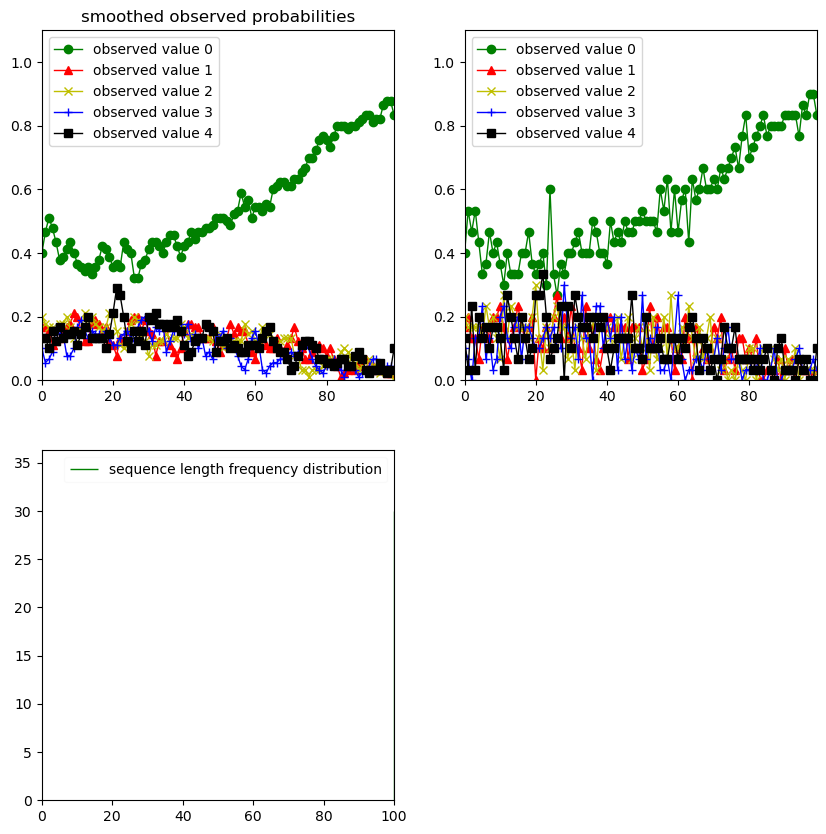

In [29]:
# Variable 1
obs.plot("Intensity", 0)

## HSCM re-estimation

### Reestimate from default initialisation

In [ ]:
from openalea.sequence_analysis import Estimate
nb_states = 8

hsmc_est = Estimate(obs, "HIDDEN_SEMI-MARKOV", "Ordinary", nb_states, "LeftRight", Nbiteration=300)   
print(hsmc_est.display())

In [ ]:
hsmc_est.plot("Intensity", 1)

In [ ]:
hsmc_est.plot("Observation", 1)


In [ ]:
hsmc_est.plot("Counting", 1)


In [ ]:
hsmc_est.plot("Recurrence", 1)


In [ ]:
hsmc_est.plot("Sojourn", 1)


In [ ]:
from openalea.sequence_analysis import seq_map
hsmc_est.extract(seq_map['Observation'],1,1).plot(Title="Observation distribution for state 1")

In [ ]:
hsmc_est.extract(seq_map['Sojourn'],0,0).plot(Title="Sojourn distribution for state 0")

# Estimate HSMC with parametric emission distributions

In [ ]:
model_file = "test_hidden_semi_markov_param.dat"

f = open(data_path + os.sep + model_file, "r")
f.close()

hsm = HiddenSemiMarkov(data_path + os.sep + model_file)

In [ ]:
hsm.plot("Intensity", 0)  

In [ ]:
set_seed(0)
nb_seq = 30
seq_length = 500
seq = hsm.simulation_nb_sequences(nb_seq, seq_length, True)
assert(len(seq) == nb_seq)
assert(len(seq[0]) == seq_length)
# NB: hsm has 1 output process but simulation includes the hidden state
assert(len(seq[0][1]) == 2)

nb_states = 3
obs = seq.select_variable([2], True)


In [ ]:
hsmc_est = Estimate(obs, "HIDDEN_SEMI-MARKOV", "Ordinary", nb_states, "Irreducible", Nbiteration=300)

In [ ]:
print(hsmc_est.display())

In [ ]:
hsmc_est.extract(seq_map['Observation'],1,0).plot(Title="Observation distribution for state 0")

In [ ]:
hsmc_est.extract(seq_map['Observation'],1,1).plot(Title="Observation distribution for state 1")

In [ ]:
hsmc_est.extract(seq_map['Observation'],1,2).plot(Title="Observation distribution for state 2")